Dane do zadania pochodzą ze strony: https://www.kaggle.com/datasets/camnugent/california-housing-prices

Celem zadania jest przewidzenie wartości median_house_value

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\natal\AppData\Local\Temp\ipykernel_5968\2259232837.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [8]:
# Wczytanie danych z pliku

data = pd.read_csv("housing.csv")

In [9]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
data.dropna(inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [13]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [14]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [15]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [16]:
# Podział danych na dane testowe(20%) i dane do trenowania(80%)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
# Połączenie danych x_train oraz y_train w celu umożliwienia zbadania przykładowej korelacji

train_data = x_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

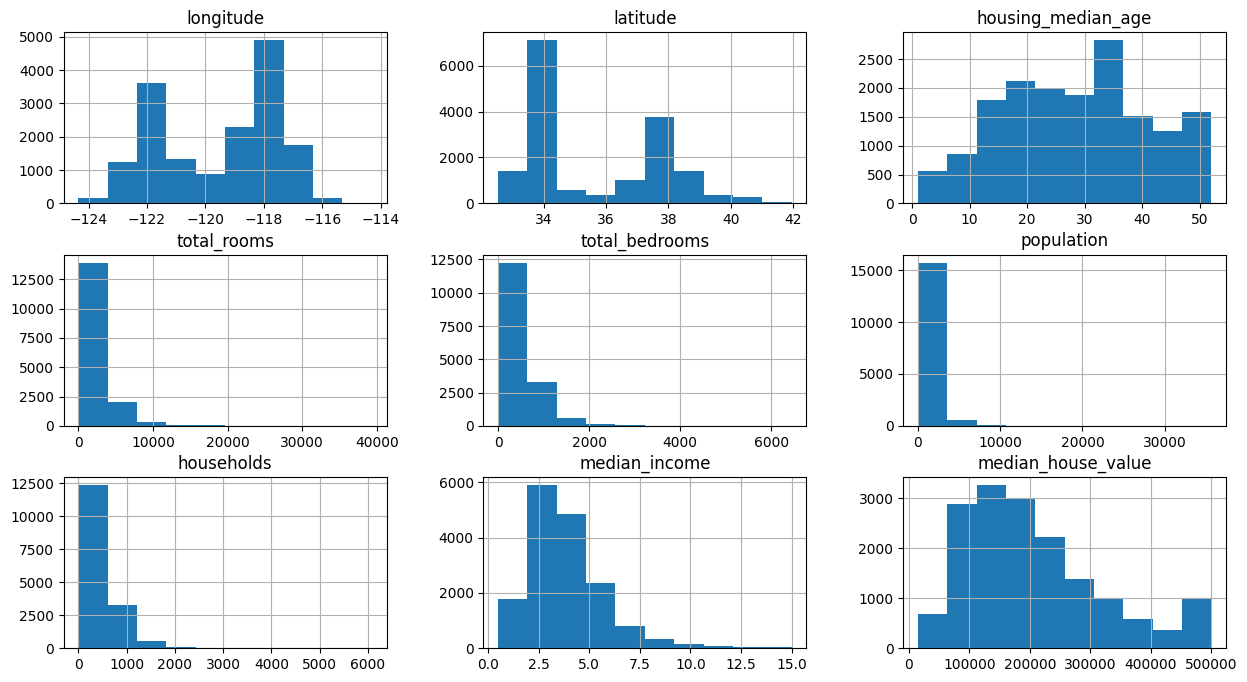

In [18]:
# Graficzne przedstawienie dystrybucji poszczególnych cech

train_data.hist(figsize=(15, 8))

<Axes: >

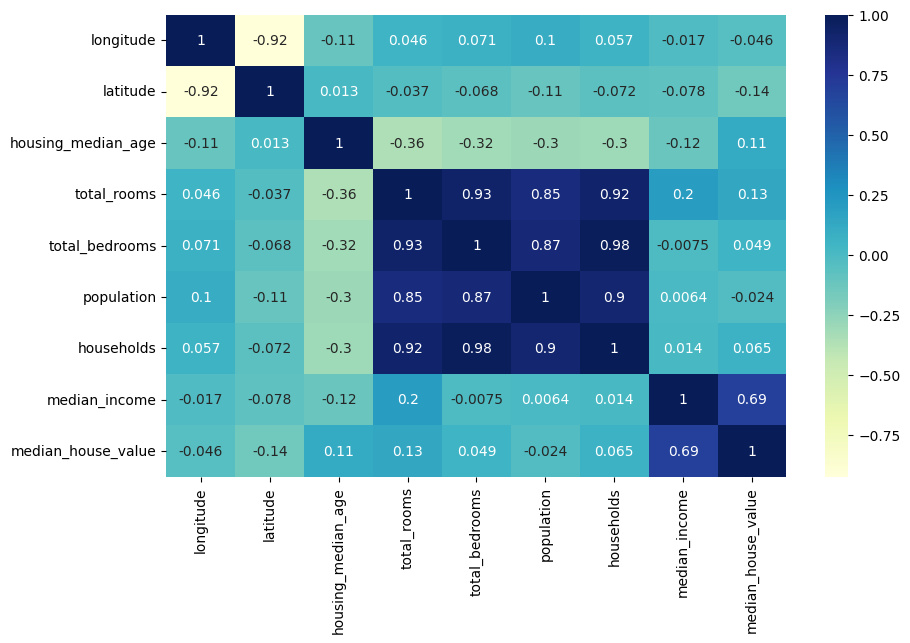

In [19]:
# Wizualizacja korelacji pomiędzy poszczególnymi cechami domów w postaci heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(train_data.drop(columns=['ocean_proximity']).corr(), annot=True, cmap='YlGnBu')

In [44]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

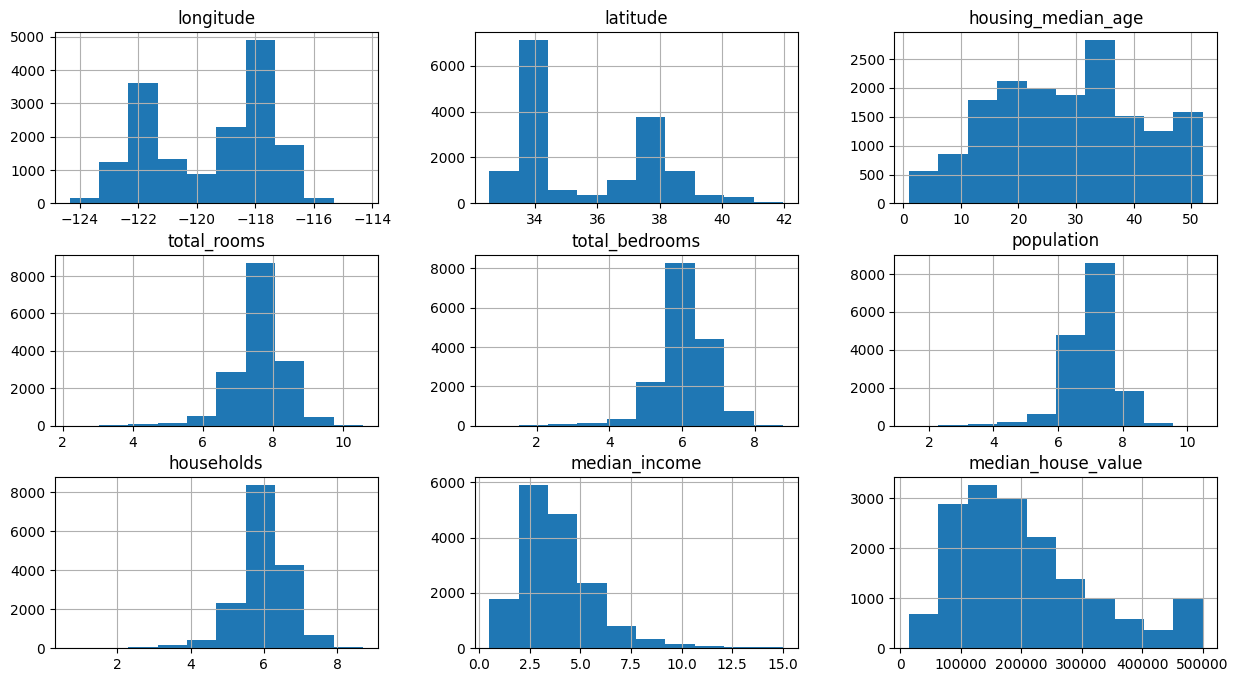

In [21]:
train_data.hist(figsize=(15,8))

In [22]:
# Przekształcenie ocean_proximity w wartości numeryczne

ocean_proximity_one_hot = pd.get_dummies(train_data.ocean_proximity).astype(int)
ocean_proximity_one_hot

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17277,0,0,0,0,1
1778,0,0,0,1,0
743,0,0,0,1,0
5190,1,0,0,0,0
11348,1,0,0,0,0
...,...,...,...,...,...
17446,0,0,0,0,1
1436,0,0,0,1,0
3895,1,0,0,0,0
12103,0,1,0,0,0


In [23]:
# Połączenie nowych kolumn dotyczących ocean_proximity z pozostałymi kolumnami

train_data = train_data.join(ocean_proximity_one_hot).drop(['ocean_proximity'], axis=1)

In [24]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17277,-119.75,34.43,23.0,8.000685,6.731018,7.183871,6.669498,3.3776,283200.0,0,0,0,0,1
1778,-122.35,37.94,34.0,7.539559,6.131226,7.214504,6.047372,1.6571,105200.0,0,0,0,1,0
743,-122.11,37.67,38.0,6.943122,5.513429,6.396930,5.416100,3.0917,167200.0,0,0,0,1,0
5190,-118.27,33.93,36.0,7.291656,5.913503,7.129298,5.852202,1.8191,92700.0,1,0,0,0,0
11348,-117.91,33.77,26.0,8.622814,7.243513,8.422003,7.195937,3.0902,190400.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17446,-120.48,34.65,26.0,7.567346,5.758902,6.909753,5.768321,4.4628,134400.0,0,0,0,0,1
1436,-122.01,37.98,29.0,7.601902,5.924256,6.863803,5.916202,4.3170,194000.0,0,0,0,1,0
3895,-118.53,34.20,33.0,8.092851,6.708084,7.658700,6.638568,3.2250,205300.0,1,0,0,0,0
12103,-117.33,33.98,52.0,7.257003,5.869297,6.782192,5.707110,1.9531,162500.0,0,1,0,0,0


<Axes: >

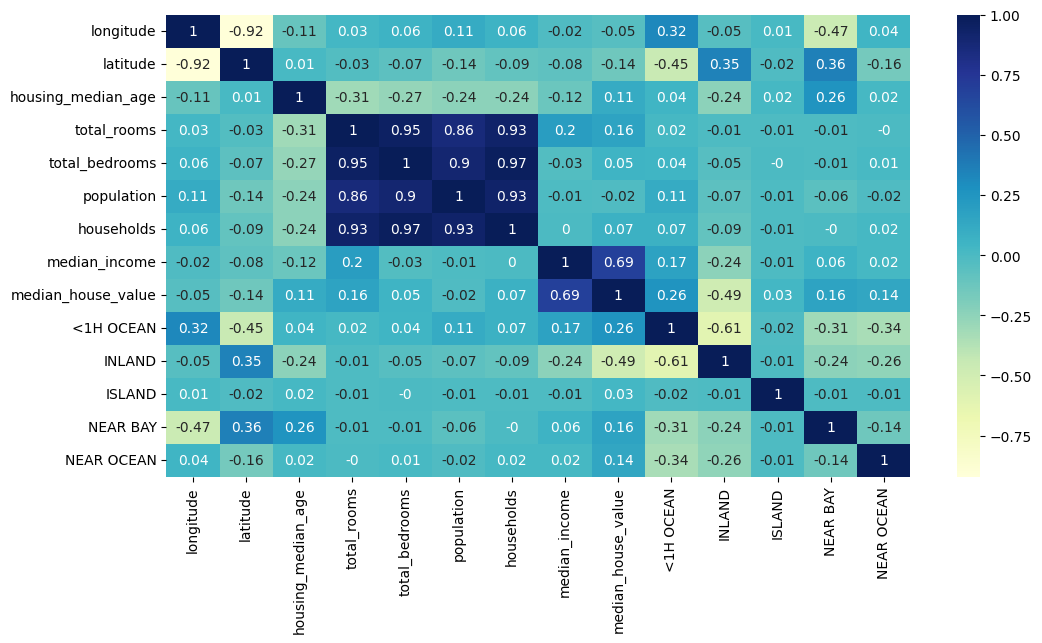

In [25]:
# Nowa wizualizacja korelacji pomiędzy poszczególnymi cechami domów w postaci heatmap

plt.figure(figsize=(12, 6))
sns.heatmap(train_data.corr().round(2), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

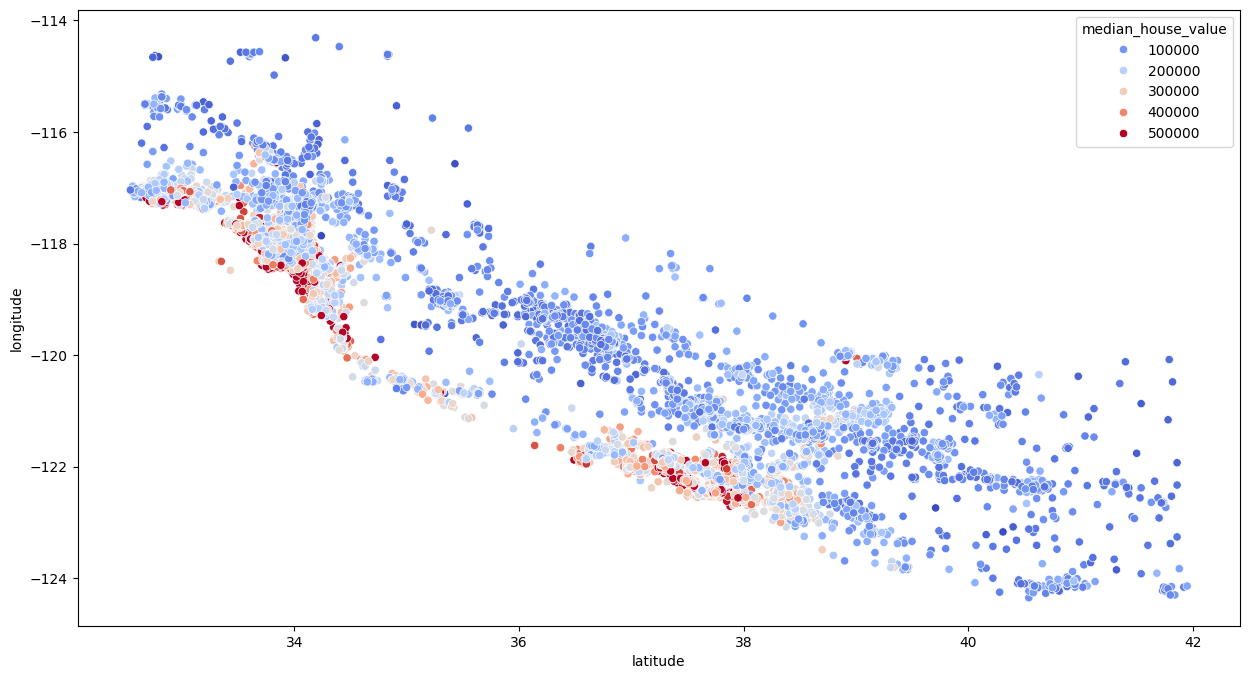

In [26]:
# Wizualizacja zmian median_house_value w zależności od położenia geograficznego

plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

<Axes: >

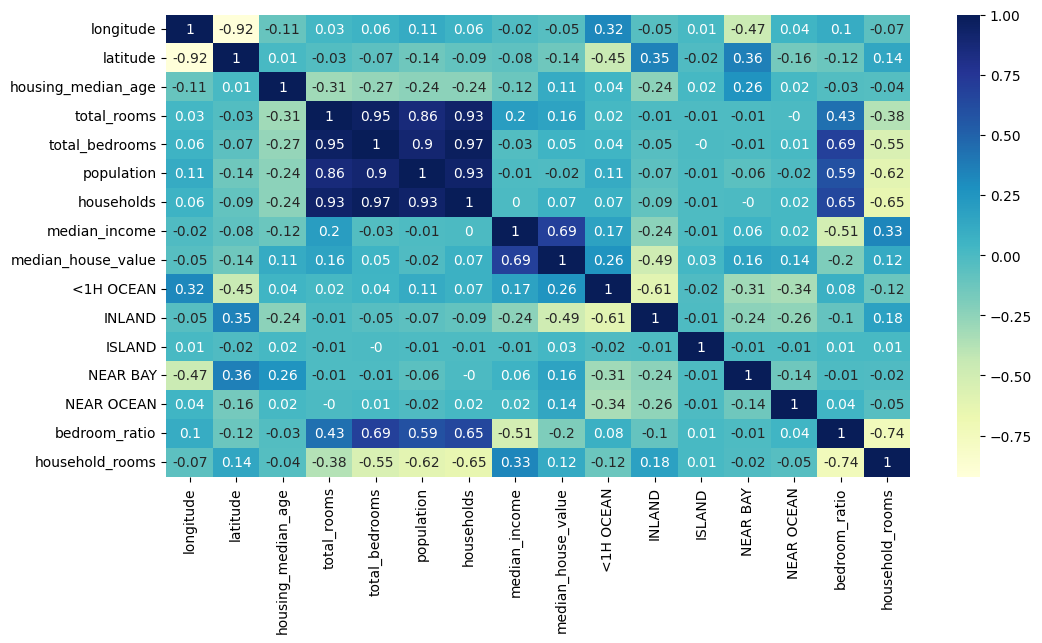

In [27]:
# Wizualizacja kolejnych zależności z uwzględnieniem nowych cech bedroom_ratio oraz household_rooms

train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']
plt.figure(figsize=(12, 6))
sns.heatmap(train_data.corr().round(2), annot=True, cmap='YlGnBu')

In [28]:
# Zastosowanie modelu regresji liniowej

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler ()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train_s, y_train)

LinearRegression()

In [29]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity).astype(int)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']



In [30]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [31]:
x_test.loc[:,'ISLAND'] = 0
x_test = x_test.loc[:,x_train.columns]
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
15154,-117.03,33.00,6.0,8.722580,6.677083,7.898782,6.647688,7.7569,1,0,0,0,0,0.765494,1.312122
10235,-117.92,33.86,26.0,6.614726,5.087596,5.513429,5.023881,3.6375,1,0,0,0,0,0.769132,1.316657
781,-122.10,37.61,35.0,7.767264,6.129050,7.454720,6.148468,4.5281,0,0,0,1,0,0.789087,1.263284
18456,-121.79,37.23,17.0,7.732808,5.886104,7.112327,5.978886,5.4193,1,0,0,0,0,0.761186,1.293353
11207,-117.92,33.83,52.0,7.323171,5.710427,6.752270,5.683580,3.6042,1,0,0,0,0,0.779775,1.288479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6134,-118.00,34.07,34.0,7.436617,6.124683,7.383989,6.056784,2.2500,0,1,0,0,0,0.823585,1.227816
13749,-117.15,34.06,25.0,8.208219,6.469250,7.504392,6.453625,4.0658,0,1,0,0,0,0.788143,1.271877
18736,-122.37,40.52,18.0,8.422443,6.652863,7.727535,6.642487,3.7896,0,1,0,0,0,0.789897,1.267965
16848,-122.42,37.61,37.0,7.532088,5.707110,6.712956,5.723585,4.7000,0,0,0,0,1,0.757706,1.315974


In [32]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
17277,-119.75,34.43,23.0,8.000685,6.731018,7.183871,6.669498,3.3776,0,0,0,0,1,0.841305,1.199593
1778,-122.35,37.94,34.0,7.539559,6.131226,7.214504,6.047372,1.6571,0,0,0,1,0,0.813208,1.246750
743,-122.11,37.67,38.0,6.943122,5.513429,6.396930,5.416100,3.0917,0,0,0,1,0,0.794085,1.281941
5190,-118.27,33.93,36.0,7.291656,5.913503,7.129298,5.852202,1.8191,1,0,0,0,0,0.810996,1.245968
11348,-117.91,33.77,26.0,8.622814,7.243513,8.422003,7.195937,3.0902,1,0,0,0,0,0.840041,1.198289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17446,-120.48,34.65,26.0,7.567346,5.758902,6.909753,5.768321,4.4628,0,0,0,0,1,0.761020,1.311880
1436,-122.01,37.98,29.0,7.601902,5.924256,6.863803,5.916202,4.3170,0,0,0,1,0,0.779312,1.284929
3895,-118.53,34.20,33.0,8.092851,6.708084,7.658700,6.638568,3.2250,1,0,0,0,0,0.828890,1.219066
12103,-117.33,33.98,52.0,7.257003,5.869297,6.782192,5.707110,1.9531,0,1,0,0,0,0.808777,1.271572


In [48]:
x_test_s = scaler.transform(x_test)

In [50]:
reg.score(x_test_s, y_test)

0.66489215506755

In [46]:
# Zastosowanie modelu Random Forest

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [36]:
forest.score(x_test, y_test)

0.8097304842848334

In [37]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [10, 20, 30],
    'max_features': [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [38]:
best_forest = grid_search.best_estimator_

In [39]:
best_forest

RandomForestRegressor(max_features=8, n_estimators=30)

In [40]:
best_forest.score(x_test_s, y_test)

0.8077053160109037

In [41]:
test_house = x_test.iloc[:5,:]
test_house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
15154,-117.03,33.00,6.0,8.722580,6.677083,7.898782,6.647688,7.7569,1,0,0,0,0,0.765494,1.312122
10235,-117.92,33.86,26.0,6.614726,5.087596,5.513429,5.023881,3.6375,1,0,0,0,0,0.769132,1.316657
781,-122.10,37.61,35.0,7.767264,6.129050,7.454720,6.148468,4.5281,0,0,0,1,0,0.789087,1.263284
18456,-121.79,37.23,17.0,7.732808,5.886104,7.112327,5.978886,5.4193,1,0,0,0,0,0.761186,1.293353
11207,-117.92,33.83,52.0,7.323171,5.710427,6.752270,5.683580,3.6042,1,0,0,0,0,0.779775,1.288479


In [42]:
best_forest.predict(test_house)

c:\Users\natal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([428243.83333333, 428243.83333333, 430497.2       , 428243.83333333,
       428243.83333333])

In [43]:
y_test.iloc[:5]

15154    387400.0
10235    133900.0
781      173600.0
18456    259500.0
11207    166400.0
Name: median_house_value, dtype: float64